# All Versions

## General Information:
The data taken from; REPUBLIC OF TURKEY PRIME MINISTRY - Disaster & Emergency Management Authority Presidential of Earthquake Department (https://deprem.afad.gov.tr/)

The data contains 4.0 - 10 (max = 7.9) magnitudes in Turkey coordinates (latitude = between 36 - 42 ,longitude = between 26 - 45)

## Version 1:

Processes: 
- Read data
- Organize columns and index
- Slicing data according to mangitudes of earthquakes
- Describe of earthquakes
- Visualization of earthquakes
- Find location (place/city) from latitude and longtitude
- Re-organize data (clean out of Turkey's place, change Turkish characters )
- Find and visualize largest earthquakes in Turkey
---
## Version 2:
Processes: 
- Read data from version - 1
- Re-organize columns  and create new main data
- Basic covariance and correlation analysis
- Visualizing: 
	- covariance and correlation
	- distributions of earthquakes
- Descriptive statements of cities
- Basic analysis of city (Balikesir)
- Summary

**Note** : Regions were not found due to their restrictions with Geocoder. I tried to find it using the Google API, but the region information was not found. I showed in version 1 how to find it with Geocoder. If anyone wants, he/she can try and find himself. Since I do not have time, there are no regions in this version ( In addition, new information can be retrieved with the Google API and region can be found with another function). I will try to add again if I have time and update later. Another problem was the Geocoder running slowly, but it cannot be solved due to restrictions. ( It can be resolved from paid platforms like the Google API, without time restrictions.)

---
Importing libraries and read datasets from v1.

**required libraries:**
- pandas
- numpy
- matplotlip
- ggplot
- seaborn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pltfrom
from plotnine import *

In [2]:
df_st = pd.read_csv('../input/f_strong.csv',usecols = [1,2,3,4,5,6,7,8,9],encoding = 'ISO-8859-1')
df_mo = pd.read_csv('../input/f_moderate.csv',usecols = [1,2,3,4,5,6,7,8,9],encoding = 'ISO-8859-1')
df_ma = pd.read_csv('../input/f_major.csv',usecols = [1,2,3,4,5,6,7,8,9],encoding = 'ISO-8859-1')
df_strong = df_st.copy()
df_moderate = df_mo.copy()
df_major = df_ma.copy()

Create the function to find only year and create new column. Also remove useless columns.

In [3]:
def fix(df):
    df['year'] = pd.DatetimeIndex(df['date']).year
    df = df.drop(['time','number'], axis = 1, inplace = True)

In [4]:
fix(df_moderate)
fix(df_strong)
fix(df_major)

We splited data 3 parts in v1 but there wasn't any place information in data.

Reassemble the parts we split and sort it oldest to newest.

In [5]:
df = pd.concat([df_moderate, df_major, df_strong], ignore_index=True)
df = df.nlargest(len(df), ['year'])
df.reset_index(drop=True, inplace=True)

In [6]:
df[['magnitude']].describe().T[['max','mean','count']]

,max,mean,count
magnitude,7.9,5.418325,573.0


Examine whether there are correlation and covariance relationship and let's visualize it.

In [7]:
df[['magnitude','depth']].cov()

,magnitude,depth
magnitude,0.242443,-1.146233
depth,-1.146233,543.810925


In [8]:
df[['magnitude','depth']].corr()

,magnitude,depth
magnitude,1.000000,-0.099826
depth,-0.099826,1.000000


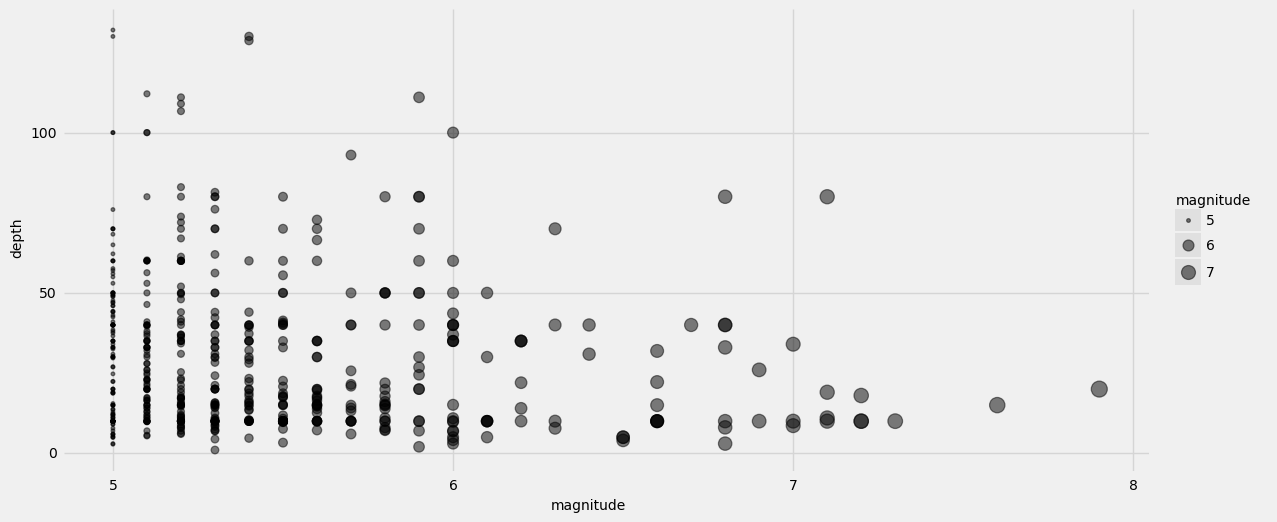

<ggplot: (8745351936409)>

In [9]:
theme_set(theme_538() +theme(figure_size = (14, 6),text = element_text(size = 10,color = 'black')))
ggplot(df, aes(x='magnitude', y='depth', size = 'magnitude')) + geom_point(alpha = 0.5, color = 'black')

Let's visualize the distribution of earthquakes by years.

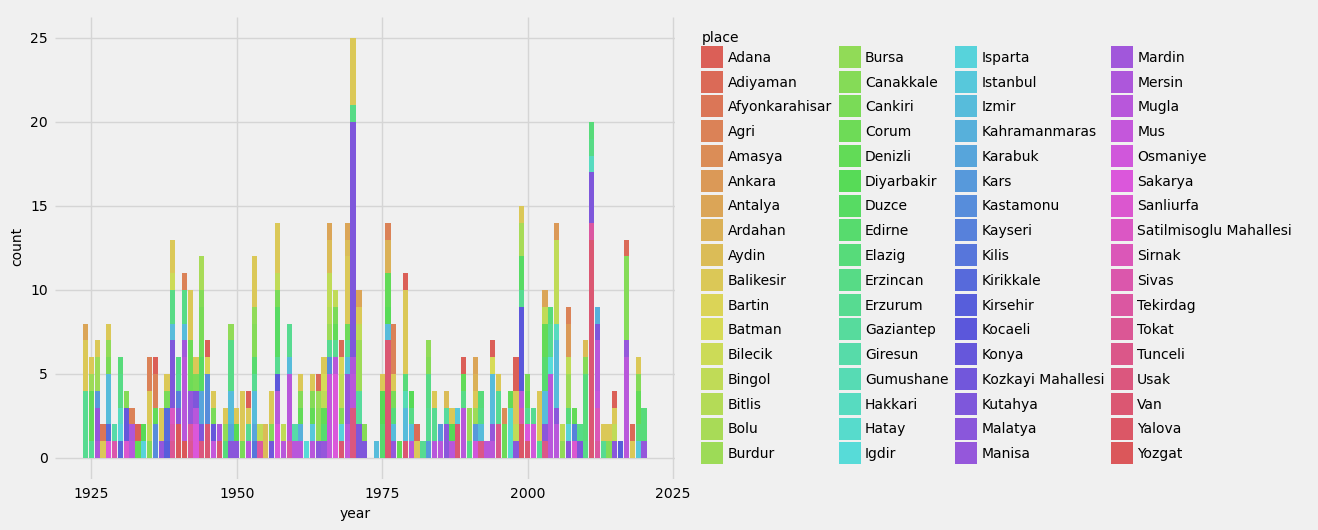

<ggplot: (8745349365089)>

In [10]:
theme_set(theme_538() + theme(figure_size = (8, 6),text = element_text(size = 10, color = 'black')))
ggplot(df, aes(x='year', fill='place')) + geom_bar(stat = 'count')

Let's focus more on the cities and visualize the distribution of earthquakes in cities by years.

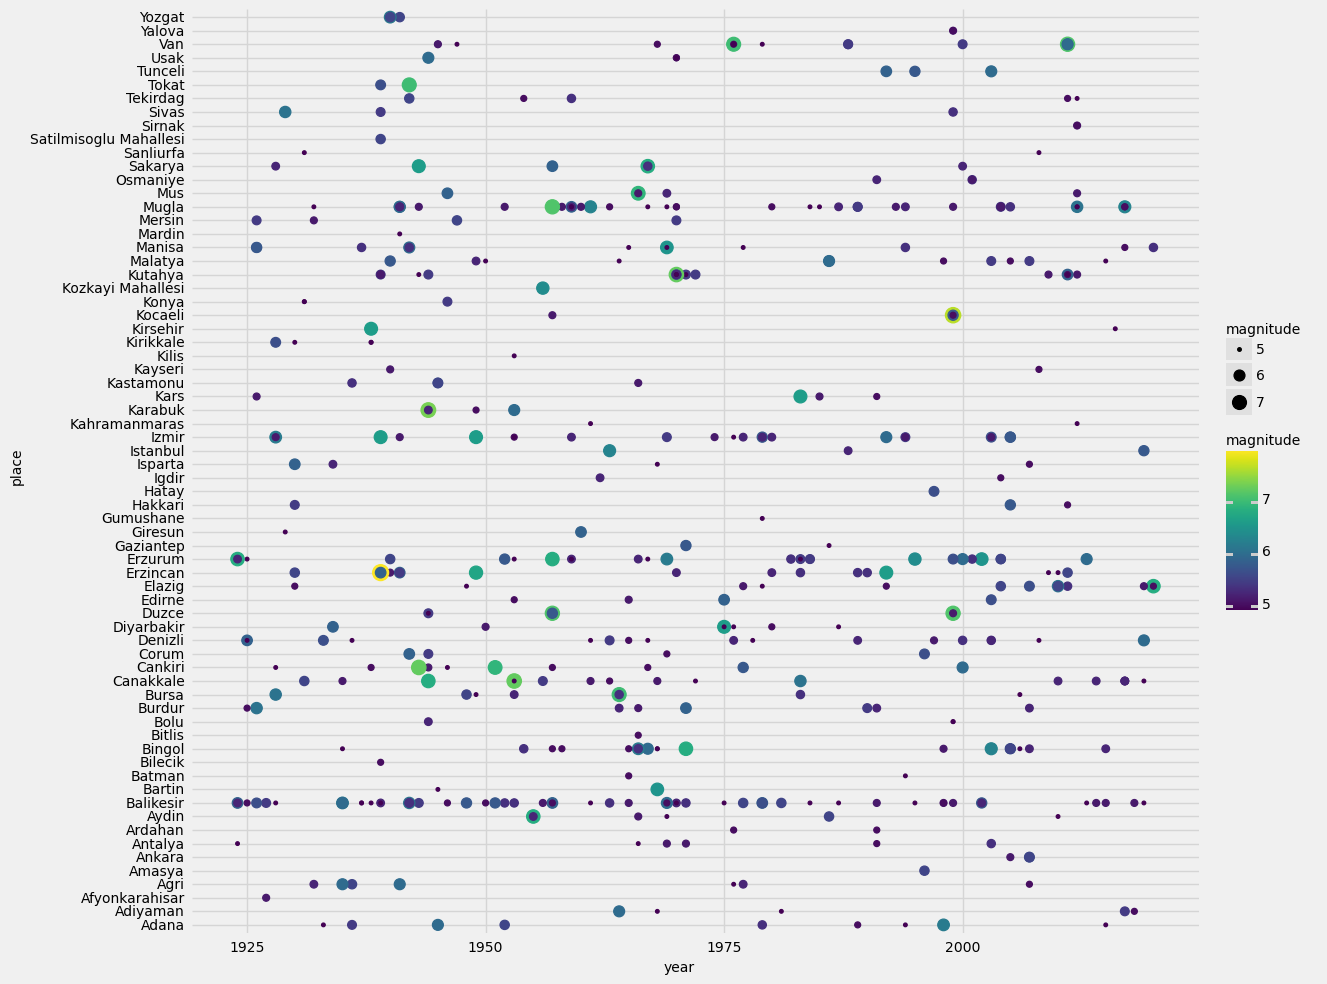

<ggplot: (8745349155285)>

In [11]:
theme_set(theme_538() + theme(figure_size = (13, 12), text = element_text(size = 10, color = 'black')))
ggplot(df, aes(x='year', y='place',size = 'magnitude', color = 'magnitude')) + geom_point()

Examine specific values about cities.

Intensity by years.

In [12]:
df['year'].value_counts().head()

1970    25
2011    20
1999    15
1957    14
1976    14
Name: year, dtype: int64

In [13]:
df['place'].value_counts().head()

Balikesir    68
Mugla        48
Kutahya      28
Van          28
Erzurum      28
Name: place, dtype: int64

Balikesir is the place with the most earthquakes. Let's find and examine earthquakes in Balikesir.

In [14]:
def find(place):
    if "balikesir" in place.lower():
        return True
    return False

In [15]:
df_balikesir = df[df["place"].apply(find)]

In [16]:
df_balikesir[['magnitude','depth']].describe().T[['count','max','mean']]

,count,max,mean
magnitude,68.0,6.2,5.310294
depth,68.0,111.0,38.614412


Visualizing earthquakes and magnitudes by years in Balikesir.

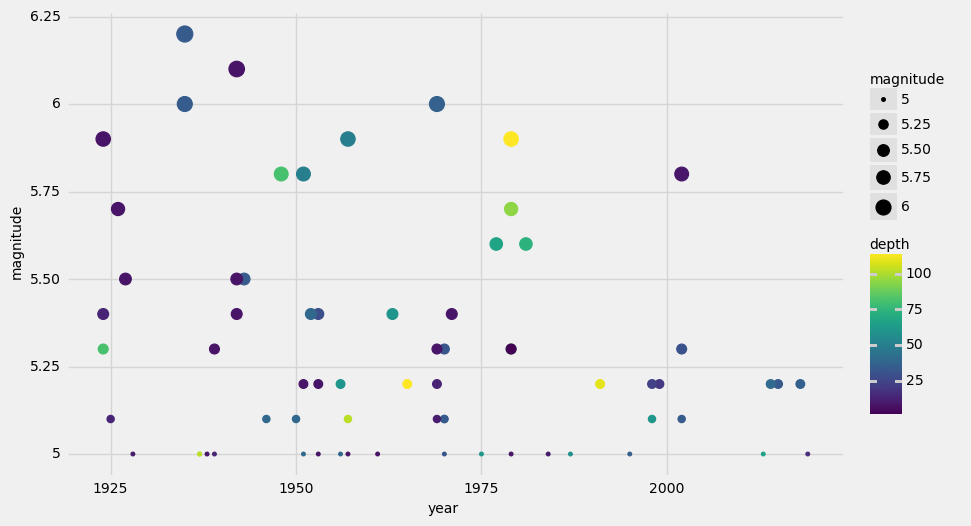

<ggplot: (8745347318005)>

In [17]:
theme_set(theme_538() + theme(figure_size = (10, 6), text = element_text(size = 10,color = 'black')))
ggplot(df_balikesir, aes(x='year', y='magnitude',size = 'magnitude',color = 'depth')) + geom_point()

### Summary

The data come from the establishment of the Republic of Turkey until the date of 06.20.2020 and were only values greater than 4.0. Earthquakes in cities and the effect of depth on earthquake magnitude were tried to be examined of Republic of Turkey. While making a review, some descriptive statements were noticed. Here are the key statements:
 
  - There were **573** earthquakes.
  - The biggest earthquake occurred in **Erzincan in 1939**. It's magnitude is **7.9**, depth is 20.0, and type is MS.
  - The most earthquake occurred **68 times in Balikesir**. The second is Mugla and it has been 48 times.
  - Most of the earthquakes occurred 25 times in **1970**. The second is 2011.
  - The covariance is **-1.146233**, the correlation is **-0.099826** . The covariance is negative. So we can say that depth and magnitude move in opposite directions with each other. But the unit of correlation is not too big. The effect to influence each other is not so much. 
  
The main purpose of this project to exercise in data manipulation and create useful data for people.